# Rawdata preprocessing

In [24]:
import pandas as pd
import numpy as np


filename = 'fashion2_rawdata.json'

df = pd.read_json(filename)
#df.head()

In [2]:
base_df = df[['id','username','hashtags']]
#base_df.head()
#base_df.info()

In [3]:
# user 1명당 hashtag 1개씩만 사용하도록 합니다. (광고성 게시물이 특정 태그의 갯수를 늘리기 때문에)
groupby_df = base_df.groupby('username').agg({'hashtags' : 'sum'})

In [4]:
# 잘못된 데이터들을 처리해줍니다.
fashion_df = groupby_df[groupby_df.astype(str)['hashtags'] != '[]']

In [5]:
fashion_df.head()

,hashtags
username,
,"[likeforfollow, outfit, follow4like, picofthed..."
03_artistseuk,"[ootd, 패션스타그램, follow4follow, heart, me, selfi..."
0lly__,"[milliner, gourde, bag, fashion, hatmaker, out..."
1079q,"[バーバリー, いいねした人で気になった人フォロー, fashion, メンズファッション,..."
173_ps,"[23, 소통, 데일리룩, 좋아요, 셀카, 운동, fashion, 나홀로, 진주, ..."


In [6]:
fashion_df = fashion_df[1:]
fashion_df.head()

,hashtags
username,
03_artistseuk,"[ootd, 패션스타그램, follow4follow, heart, me, selfi..."
0lly__,"[milliner, gourde, bag, fashion, hatmaker, out..."
1079q,"[バーバリー, いいねした人で気になった人フォロー, fashion, メンズファッション,..."
173_ps,"[23, 소통, 데일리룩, 좋아요, 셀카, 운동, fashion, 나홀로, 진주, ..."
2oisdemelissa,"[melisseiras, melissando, love, boy, melissas,..."


In [7]:
fashion_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 780 entries, 03_artistseuk to zombieboyloco_
Data columns (total 1 columns):
hashtags    780 non-null object
dtypes: object(1)
memory usage: 12.2+ KB


In [8]:
def getTagsDict(df):
    tag_dict = {}
    
    for index, row in df.iterrows():
        for tag in row['hashtags']:
            if tag in tag_dict:
                tag_dict[tag] = tag_dict[tag] + 1
            else:
                tag_dict[tag] = 1
                
    sort_dict = sorted(tag_dict.items(), key=lambda kv: kv[1])
    return sort_dict

sort_dict = getTagsDict(fashion_df)

In [11]:
sort_dict[-10:]

[('ootd', 129),
 ('follow', 131),
 ('cute', 131),
 ('photography', 136),
 ('beautiful', 164),
 ('photooftheday', 197),
 ('instagood', 214),
 ('love', 228),
 ('style', 267),
 ('fashion', 830)]

In [12]:
# 데이터는 780개인데 fashion태그는 829개 입니다. set을 이용해서 정리해줍니다.

tag_df = fashion_df['hashtags']

for i in range(len(tag_df)):
    if "fashion" in tag_df[i] == False:
        print(tag_df[i])
    tag_df[i] = list(set(tag_df[i]))

fashion_df['hashtags'] = tag_df


In [13]:
sort_dict = getTagsDict(fashion_df)
print(sort_dict[-10:])
print(fashion_df.info())

[('model', 114), ('follow', 117), ('cute', 117), ('photography', 130), ('beautiful', 145), ('photooftheday', 181), ('instagood', 193), ('love', 207), ('style', 252), ('fashion', 764)]
<class 'pandas.core.frame.DataFrame'>
Index: 780 entries, 03_artistseuk to zombieboyloco_
Data columns (total 1 columns):
hashtags    780 non-null object
dtypes: object(1)
memory usage: 32.2+ KB
None


In [14]:
# 이번에는 fashion 태그의 갯수가 부족합니다. fashion태그를 가지고 있지 않은 row데이터를 지워줍니다.
remove_index_list = []

for index,raw in fashion_df.iterrows():
    for i in raw:
        if 'fashion' in i:
            pass
        else:
            remove_index_list.append(index)
            
fashion_df = fashion_df.drop(remove_index_list)

In [15]:
sort_dict = getTagsDict(fashion_df)

print(sort_dict[-1])
print(fashion_df.info())

('fashion', 764)
<class 'pandas.core.frame.DataFrame'>
Index: 764 entries, 03_artistseuk to zombieboyloco_
Data columns (total 1 columns):
hashtags    764 non-null object
dtypes: object(1)
memory usage: 11.9+ KB
None


#### 피어슨 상관계수 r = A와B가 함께 변하는 정도 / A와 B가 각각 변하는 정도

In [16]:
df_500 = fashion_df[:500]
sort_dict = getTagsDict(df_500)
fashion_dict = sort_dict[-30:]

df_500.head()

,hashtags
username,
03_artistseuk,"[follow, selfie_time, photooftheday, 패션, follo..."
0lly__,"[bag, twins, streetwear, brunette, ootd, style..."
1079q,"[原宿系, instagood, ノームコア, モード系, いいね返し, koreanfas..."
173_ps,"[소통, 진주, 셀스타그램, 23, 맞팔, 선팔, 일상, 첫줄, 셀피, 스마일, 데..."
2oisdemelissa,"[melissas, cute, melisseira, melissafamily, me..."


In [17]:
fashion_dict

[('tbt', 38),
 ('moda', 40),
 ('art', 41),
 ('fashionista', 41),
 ('smile', 42),
 ('instafashion', 42),
 ('selfie', 43),
 ('photo', 44),
 ('outfit', 45),
 ('like4like', 49),
 ('instalike', 50),
 ('me', 53),
 ('happy', 54),
 ('beauty', 56),
 ('fashionblogger', 57),
 ('girl', 61),
 ('instadaily', 62),
 ('followme', 68),
 ('ootd', 69),
 ('model', 72),
 ('picoftheday', 74),
 ('follow', 75),
 ('cute', 75),
 ('photography', 89),
 ('beautiful', 94),
 ('photooftheday', 119),
 ('instagood', 126),
 ('love', 132),
 ('style', 158),
 ('fashion', 500)]

In [18]:
tag_list = []
for i in fashion_dict:
    tag_list.append(i[0])

print(tag_list)
    

['tbt', 'moda', 'art', 'fashionista', 'smile', 'instafashion', 'selfie', 'photo', 'outfit', 'like4like', 'instalike', 'me', 'happy', 'beauty', 'fashionblogger', 'girl', 'instadaily', 'followme', 'ootd', 'model', 'picoftheday', 'follow', 'cute', 'photography', 'beautiful', 'photooftheday', 'instagood', 'love', 'style', 'fashion']


In [19]:
tmp = list()
for i in range(len(tag_list)):
    tmp.append(0)
len(tmp)

30

In [46]:
test=df_500.loc['03_artistseuk']
test['hashtags']

['follow',
 'selfie_time',
 'photooftheday',
 '패션',
 'followme',
 'heart',
 'instagood',
 'swag',
 '패션스타그램',
 'ootd',
 'tbt',
 'love',
 '얼스타그램',
 'selfie',
 'f4f',
 'fashion',
 'tagsforlikesapp',
 'korea',
 'follow4follow',
 '좋아요반사',
 'follow4like',
 'me',
 '좋아요',
 'instadaily',
 'follow4followback',
 'followback',
 'followforfollowback',
 'likeforfollow',
 'i4i',
 'selfies']

In [51]:
test = [1,2,3,4,5]
test2 = test.copy()
test2.append(7)

print(test)
print(test2)

[1, 2, 3, 4, 5]
[1, 2, 3, 4, 5, 7]


# DataFrame 구성하기
### row는 글번호 (0번째 글, 1번째 글...) column은 tag_list

In [52]:
# Affinity Matrix를 만들기 위힌 dataFrame을 만드는 함수입니다.

def get_DataFrame_for_affinity(df,taglist):
    
    result_df = pd.DataFrame(index = np.arange(0,len(df)),columns=taglist)    
    
    zero_list = list()
    for i in range(len(taglist)):
        zero_list.append(0)
    
    i = 0
    for index,row in df.iterrows():
        
        tmp_df = df.loc[index]
        tmp_list = zero_list.copy()
        
        hashlist = tmp_df['hashtags']
        
        for tag in hashlist:
            if tag in taglist:
                tagindex = taglist.index(tag)
                tmp_list[tagindex] = 1
        
        result_df.loc[i] = tmp_list
        i += 1
    
    return result_df
        

In [53]:
before_corr = get_DataFrame_for_affinity(df_500,tag_list)

In [97]:
before_corr

,tbt,moda,art,fashionista,smile,instafashion,selfie,photo,outfit,like4like,...,picoftheday,follow,cute,photography,beautiful,photooftheday,instagood,love,style,fashion
0,1,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,1,1,1,0,1
1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,1
5,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7,1,0,1,0,1,0,1,0,0,1,...,1,1,1,0,1,1,1,1,1,1
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [98]:
corr_affinity = before_corr.corr(method = 'pearson')

In [104]:
corr_affinity['ootd'].sort_values(ascending =False)

ootd              1.000000
outfit            0.360471
fashionista       0.197446
instafashion      0.192409
fashionblogger    0.184905
style             0.127173
selfie            0.084097
instagood         0.061599
instadaily        0.060595
love              0.036624
like4like         0.024146
instalike         0.021262
follow            0.010556
followme         -0.006496
photooftheday    -0.019363
photography      -0.019435
tbt              -0.027222
beauty           -0.031774
smile            -0.037545
girl             -0.042842
me               -0.043589
picoftheday      -0.052452
art              -0.056178
beautiful        -0.058951
model            -0.065009
moda             -0.075239
happy            -0.083176
photo            -0.083350
cute             -0.086883
fashion                NaN
Name: ootd, dtype: float64

In [106]:
corr_affinity = corr_affinity.drop('fashion',axis=1)

In [107]:
corr_affinity = corr_affinity.drop('fashion',axis = 0)

In [70]:
corr_affinity

,tbt,moda,art,fashionista,smile,instafashion,selfie,photo,outfit,like4like,...,model,picoftheday,follow,cute,photography,beautiful,photooftheday,instagood,love,style
tbt,1.000000,-0.028932,0.216873,-0.085715,0.375691,-0.032432,0.477334,0.070758,-0.063821,0.337006,...,-0.010146,0.390560,0.407934,0.450206,0.024387,0.325600,0.353667,0.407190,0.393251,-0.000130
moda,-0.028932,1.000000,-0.088133,0.073086,-0.089298,0.043586,-0.090454,-0.065577,0.036064,-0.097199,...,-0.036956,-0.102142,-0.123876,-0.123876,-0.060131,-0.141890,-0.112868,-0.086259,-0.076263,-0.041862
art,0.216873,-0.088133,1.000000,-0.036187,0.198567,-0.037947,0.220327,0.215938,-0.068519,0.097631,...,0.230383,0.224414,0.221501,0.160257,0.261120,0.285305,0.209550,0.212696,0.267505,0.141805
fashionista,-0.085715,0.073086,-0.036187,1.000000,-0.037947,0.251125,-0.091677,-0.092839,0.160727,-0.024959,...,0.022756,-0.021924,-0.084722,-0.043892,-0.043793,0.005448,-0.047210,-0.005574,-0.046701,0.094766
smile,0.375691,-0.089298,0.198567,-0.037947,1.000000,-0.013724,0.447167,0.287697,-0.044846,0.239695,...,0.019551,0.422008,0.438175,0.438175,0.085275,0.370995,0.338683,0.339049,0.391127,0.088833
instafashion,-0.032432,0.043586,-0.037947,0.251125,-0.013724,1.000000,-0.067173,-0.043165,0.282679,-0.002813,...,0.122233,-0.044995,-0.006058,0.014135,-0.027822,0.057281,0.084722,0.073337,0.014918,0.212901
selfie,0.477334,-0.090454,0.220327,-0.091677,0.447167,-0.067173,1.000000,0.131343,-0.021686,0.258793,...,-0.024220,0.334200,0.370592,0.350614,0.062400,0.217561,0.264097,0.347740,0.317969,0.052353
photo,0.070758,-0.065577,0.215938,-0.092839,0.287697,-0.043165,0.131343,1.000000,-0.023682,0.040082,...,0.174217,0.208513,0.185851,0.166079,0.372227,0.229982,0.290575,0.161176,0.262404,0.047013
outfit,-0.063821,0.036064,-0.068519,0.160727,-0.044846,0.282679,-0.021686,-0.023682,1.000000,-0.009637,...,0.229310,-0.012989,0.004893,0.102752,-0.018453,0.063319,0.119633,0.091107,0.017757,0.222173
like4like,0.337006,-0.097199,0.097631,-0.024959,0.239695,-0.002813,0.258793,0.040082,-0.009637,1.000000,...,-0.020233,0.374099,0.426704,0.162958,0.163163,0.306255,0.321259,0.350969,0.229886,-0.021472


In [509]:
import numpy as np

def getData(df,taglist,num):
    data = pd.DataFrame(index=np.arange(0,len(taglist)),columns=taglist)
    
    
    for x in range(num):
        tmp_df = df[:x]
        
        tag_num = list()
        for i in range(len(taglist)):
            tag_num.append(0)

        for index, row in tmp_df.iterrows():
            for tag in row['hashtags']:
                if tag in taglist:
                    tagindex = taglist.index(tag)
                    tag_num[tagindex] = tag_num[tagindex] + 1
        
#         for i in range(len(taglist)):
#             if x == 0:
#                 continue
#             tag_num[i] = (tag_num[i]/ x*(1.1) + tag_num[i])
            
        data.loc[x] = tag_num
    
    return data
#tag_list.remove('fashion')
dfdfdf = getData(df_500,tag_list,500)

In [510]:
dfdfdf

,tbt,moda,art,fashionista,smile,instafashion,selfie,photo,outfit,like4like,...,picoftheday,follow,cute,photography,beautiful,photooftheday,instagood,love,style,fashion
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,1,1,1,0,1
2,1,0,0,0,0,0,1,0,1,0,...,0,1,0,0,0,1,1,1,0,2
3,1,0,0,0,0,0,1,0,1,0,...,0,1,0,0,0,1,2,1,0,3
4,1,0,0,0,0,0,1,0,1,0,...,0,1,0,0,0,1,2,1,0,4
5,1,0,0,0,0,0,1,0,1,0,...,0,1,1,0,0,1,2,2,0,5
6,1,0,0,0,0,0,1,0,2,0,...,0,1,1,0,0,2,2,2,0,6
7,1,0,0,0,0,0,1,0,2,0,...,0,1,1,0,0,2,2,2,0,7
8,2,0,1,0,1,0,2,0,2,1,...,1,2,2,0,1,3,3,3,1,8
9,2,0,1,0,1,0,2,0,2,1,...,1,2,2,0,1,3,3,3,1,9


In [444]:
dfdfdf = dfdfdf.drop('fashion',axis=1)

In [511]:
dfdfdf = dfdfdf.astype('float64')
corr = dfdfdf.corr(method = 'pearson')

In [512]:
corr

,tbt,moda,art,fashionista,smile,instafashion,selfie,photo,outfit,like4like,...,picoftheday,follow,cute,photography,beautiful,photooftheday,instagood,love,style,fashion
tbt,1.000000,0.978204,0.988817,0.963729,0.993624,0.964020,0.983361,0.995438,0.956646,0.967255,...,0.995815,0.983624,0.992057,0.991000,0.988719,0.994215,0.993036,0.992781,0.985687,0.990977
moda,0.978204,1.000000,0.972797,0.972315,0.967428,0.968060,0.948419,0.976415,0.942194,0.955902,...,0.984654,0.966194,0.981303,0.981091,0.977328,0.974481,0.975300,0.980761,0.978900,0.984575
art,0.988817,0.972797,1.000000,0.961670,0.988152,0.965460,0.980853,0.989492,0.958895,0.971925,...,0.991430,0.986405,0.990371,0.992648,0.988527,0.991085,0.989750,0.996227,0.988060,0.992212
fashionista,0.963729,0.972315,0.961670,1.000000,0.944626,0.994884,0.965921,0.961376,0.984323,0.953853,...,0.973227,0.973476,0.984549,0.974422,0.987961,0.977043,0.980660,0.974355,0.989978,0.984032
smile,0.993624,0.967428,0.988152,0.944626,1.000000,0.945229,0.974267,0.993192,0.940349,0.962189,...,0.990921,0.976495,0.983838,0.988235,0.978526,0.988924,0.985817,0.990396,0.975966,0.984210
instafashion,0.964020,0.968060,0.965460,0.994884,0.945229,1.000000,0.972890,0.964286,0.989785,0.958886,...,0.973490,0.979632,0.986229,0.974418,0.988429,0.977494,0.982874,0.976523,0.991538,0.985047
selfie,0.983361,0.948419,0.980853,0.965921,0.974267,0.972890,1.000000,0.982569,0.982540,0.975566,...,0.983845,0.992567,0.987509,0.983414,0.989140,0.990058,0.992954,0.984196,0.987089,0.985420
photo,0.995438,0.976415,0.989492,0.961376,0.993192,0.964286,0.982569,1.000000,0.957647,0.967722,...,0.995534,0.983432,0.991163,0.991403,0.987064,0.993701,0.992783,0.992613,0.985515,0.990865
outfit,0.956646,0.942194,0.958895,0.984323,0.940349,0.989785,0.982540,0.957647,1.000000,0.961017,...,0.965503,0.981010,0.978981,0.969919,0.984757,0.976214,0.981756,0.968845,0.986557,0.978005
like4like,0.967255,0.955902,0.971925,0.953853,0.962189,0.958886,0.975566,0.967722,0.961017,1.000000,...,0.977910,0.989069,0.971646,0.983471,0.974871,0.970301,0.977805,0.976382,0.975871,0.979693


In [519]:
print(tag_list)

['tbt', 'moda', 'art', 'fashionista', 'smile', 'instafashion', 'selfie', 'photo', 'outfit', 'like4like', 'instalike', 'me', 'happy', 'beauty', 'fashionblogger', 'girl', 'instadaily', 'followme', 'ootd', 'model', 'picoftheday', 'follow', 'cute', 'photography', 'beautiful', 'photooftheday', 'instagood', 'love', 'style', 'fashion']


In [455]:
b = corr["style"].sort_values(ascending = False)

In [482]:
max_v = b[1]
b[b == max_v].index[0]
print(max_v)

0.9985177186782574


In [88]:
max_values = []
for tag in tag_list:
    if tag == 'fashion':
        continue
    series = corr_affinity[tag].sort_values(ascending = False)
    max_value = series[1]
    max_values.append(series[series == max_value].index[0])

In [89]:
print(max_values[:5])
print(tag_list[:5])


['instadaily', 'fashionista', 'happy', 'fashionblogger', 'me']
['tbt', 'moda', 'art', 'fashionista', 'smile']


In [389]:
pearson = corr["style"]

In [390]:
pearson_dict = dict(pearson)
values = pearson_dict.values()

In [391]:
min_value = min(list(values))
max_value = max(list(values))

In [392]:
def normalize(data):
    pearson_dict = dict(data)
    values = pearson_dict.values()
    keys = pearson_dict.keys()
    
    values = list(values)
    keys = list(keys)
    
    min_value = min(values)
    max_value = max(values)
    
    for i in range(len(values)):
        values[i] = (values[i] - min_value)/(max_value - min_value)
        pearson_dict[keys[i]] = values[i]
    
    result = pd.DataFrame(pearson_dict)
    
    return result
    

In [407]:
from sklearn import preprocessing

scaler = preprocessing.MinMaxScaler()

In [408]:
new_df = scaler.fit_transform(corr)

In [409]:
new_df

array([[1.        , 0.70757296, 0.59915163, ..., 0.80516148, 0.69435735,
        0.79244085],
       [0.72083769, 1.        , 0.5827407 , ..., 0.81032149, 0.73148052,
        0.65831983],
       [0.74000564, 0.71650162, 1.        , ..., 0.84688874, 0.92162093,
        0.90585748],
       ...,
       [0.87878992, 0.87639308, 0.85314551, ..., 1.        , 0.9208211 ,
        0.94346404],
       [0.78779411, 0.80470999, 0.91610042, ..., 0.91163322, 1.        ,
        0.90258996],
       [0.85445254, 0.7490176 , 0.89821945, ..., 0.93627298, 0.90161634,
        1.        ]])

In [410]:
affinity = pd.DataFrame(new_df)
old_names = []
for i in range(50):
    old_names.append(i)
new_names = tag_list

affinity.rename(columns=dict(zip(old_names,new_names)), inplace=True)
affinity.rename(index=dict(zip(old_names,new_names)), inplace=True)
affinity['like']['like']

1.0

In [108]:
from sklearn.cluster import SpectralClustering

sc = SpectralClustering()
sc

SpectralClustering(affinity='rbf', assign_labels='kmeans', coef0=1, degree=3,
          eigen_solver=None, eigen_tol=0.0, gamma=1.0, kernel_params=None,
          n_clusters=8, n_init=10, n_jobs=None, n_neighbors=10,
          random_state=None)

In [109]:
sc.fit(corr_affinity)
predict = pd.DataFrame(sc.fit_predict(corr_affinity))
predict.columns = ['predict']
predict.head()

,predict
0,0
1,2
2,5
3,2
4,0


# Build Node

In [110]:
top50 = pd.DataFrame(fashion_dict, columns=['Tag','Freq'])


In [111]:
node_df = top50

In [112]:
node_df['Group'] = predict

In [113]:
node_df = node_df[:49]
node_df = node_df.drop(29,axis=0)

In [114]:
import networkx as nx
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

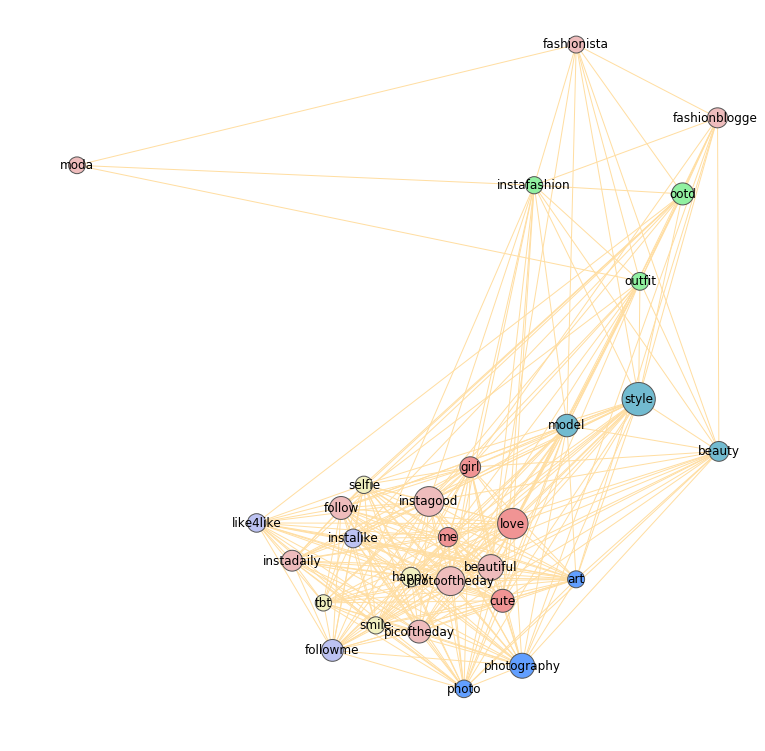

In [115]:
G = nx.Graph(day = "Stackoverflow")

for index,row in node_df.iterrows():
    G.add_node(row['Tag'], group = row['Group'], nodesize = row['Freq'])
    
for index1,row1 in node_df.iterrows():
    for index2,row2 in node_df.iterrows():
        if row1['Tag'] == row2['Tag']:
            continue
        if corr_affinity[row1['Tag']][row2['Tag']] > 0:
            G.add_edge(row1['Tag'],row2['Tag'],weight = corr_affinity[row1['Tag']][row2['Tag']]*3)

# i = 0
# for index1,row1 in node_df.iterrows():
#     G.add_edge(row1['Tag'],max_values[i],weight = 1)
#     i = i+1

color_map = {1:'#f09494', 2:'#eebcbc', 3:'#72bbd0', 4:'#91f0a1', 5:'#629fff', 6:'#bcc2f2',  
             7:'#eebcbc', 0:'#f1f0c0'}
plt.figure(figsize = (10,10))

options = {
    'edge_color': '#FFDEA2',
    'width': 1,
    'with_labels': True,
    'font_weight': 'regular',
}

colors = [color_map[G.node[node]['group']] for node in G]
sizes = [G.node[node]['nodesize']*7 for node in G]

nx.draw(G, node_color=colors, node_size=sizes, pos=nx.spring_layout(G, k=0.1, iterations=10), **options)
ax = plt.gca()
ax.collections[0].set_edgecolor("#555555") 
plt.show()